## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

Mon Jul 15 08:10:56 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 425.31       Driver Version: 425.31       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GT 750M    WDDM  | 00000000:01:00.0 N/A |                  N/A |
| N/A   52C    P0    N/A /  N/A |     38MiB /  2048MiB |     N/A      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" # 設定 smi 看到的 GPU ID 符合實際設定的順序 (若一台機器有多張不同型號的卡時，會有此類問題)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = 2*(((x - x.min()) / (x.max() - x.min()))-0.5)   
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y   

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

W0715 08:17:42.243298 13480 deprecation_wrapper.py:119] From E:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0715 08:17:43.993145 13480 deprecation_wrapper.py:119] From E:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0715 08:17:45.558617 13480 deprecation_wrapper.py:119] From E:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total para

In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0715 08:17:52.574693 13480 deprecation_wrapper.py:119] From E:\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0715 08:17:52.603813 13480 deprecation_wrapper.py:119] From E:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0715 08:18:02.018139 13480 deprecation.py:323] From E:\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0715 08:18:02.138096 13480 deprecation_wrapper.py:119] From E:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 18s 351us/step - loss: 1.7322 - acc: 0.3877 - val_loss: 1.5682 - val_acc: 0.4451
Epoch 2/100
50000/50000 [==============================] - 12s 243us/step - loss: 1.4902 - acc: 0.4738 - val_loss: 1.5110 - val_acc: 0.4711
Epoch 3/100
50000/50000 [==============================] - 13s 252us/step - loss: 1.3709 - acc: 0.5162 - val_loss: 1.4138 - val_acc: 0.5059
Epoch 4/100
50000/50000 [==============================] - 13s 259us/step - loss: 1.2769 - acc: 0.5511 - val_loss: 1.3687 - val_acc: 0.5178
Epoch 5/100
50000/50000 [==============================] - 12s 246us/step - loss: 1.1936 - acc: 0.5802 - val_loss: 1.3772 - val_acc: 0.5186
Epoch 6/100
50000/50000 [==============================] - 12s 247us/step - loss: 1.1201 - acc: 0.6061 - val_loss: 1.3784 - val_acc: 0.5297
Epoch 7/100
50000/50000 [==============================] - 12s 248us/step - loss: 1.0398 - acc: 0.6329 - val_l

50000/50000 [==============================] - 12s 237us/step - loss: 0.0925 - acc: 0.9693 - val_loss: 3.7578 - val_acc: 0.5271
Epoch 59/100
50000/50000 [==============================] - 12s 237us/step - loss: 0.1071 - acc: 0.9639 - val_loss: 3.7369 - val_acc: 0.5205
Epoch 60/100
50000/50000 [==============================] - 12s 235us/step - loss: 0.1012 - acc: 0.9670 - val_loss: 3.6431 - val_acc: 0.5269
Epoch 61/100
50000/50000 [==============================] - 12s 235us/step - loss: 0.0806 - acc: 0.9735 - val_loss: 3.8200 - val_acc: 0.5263
Epoch 62/100
50000/50000 [==============================] - 12s 234us/step - loss: 0.0903 - acc: 0.9700 - val_loss: 3.7083 - val_acc: 0.5290
Epoch 63/100
50000/50000 [==============================] - 12s 236us/step - loss: 0.0924 - acc: 0.9694 - val_loss: 3.8246 - val_acc: 0.5332
Epoch 64/100
50000/50000 [==============================] - 12s 241us/step - loss: 0.0842 - acc: 0.9725 - val_loss: 3.8613 - val_acc: 0.5230
Epoch 65/100
50000/50000 [

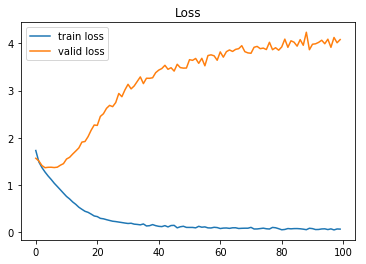

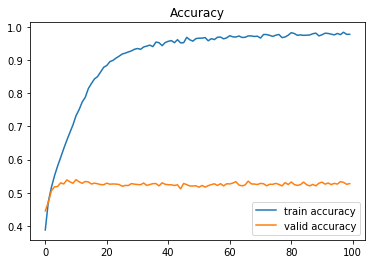

In [11]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()